In [1]:

from ont_fast5_api.fast5_interface import get_fast5_file

def get_data_from_fast5(fast5_filepath):
    raw_data_arr = []
    read_ids = []
    with get_fast5_file(fast5_filepath, mode="r") as f5:
        for read in f5.get_reads():
            raw_data = read.get_raw_data()
            raw_data_arr.append(raw_data)
            read_ids.append(read.read_id)
    return raw_data_arr, read_ids


## Extracting Sequence for each Read

In [2]:
fasta_filepath = r"C:\Users\Parv\Doc\HelixWorks\Basecalling\squigulator\sample.fa.txt"
read_sequences = []

with open(fasta_filepath, "r") as f:
    fasta_seq = f.readlines()[1]

In [3]:
for read_id in read_ids:
    split_id = read_id.split('!') # To get the starting and ending character positions for the specific read id
    starting_pos, ending_pos = int(split_id[2]), int(split_id[3])
    read_seq = fasta_seq[starting_pos:ending_pos]
    read_sequences.append(read_seq)
    

In [4]:
len(read_sequences) == len(read_ids) == len(raw_data_arr)

True

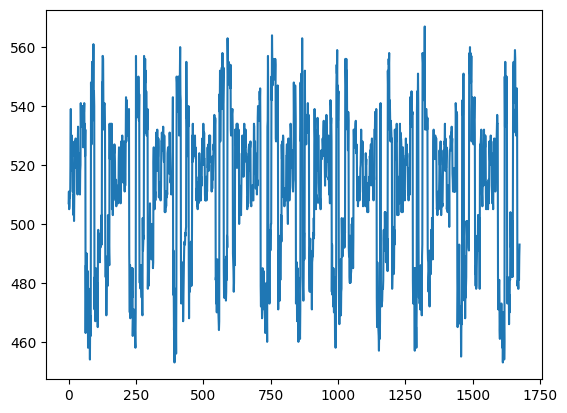

TCAGCTTCATTCGTCGAACATGCTTCCATGGCACTCATCAATCCGTATCTATGAGGTCTGCCTTACACTGGCACTCATCAATCCGTATCTATGAGGTCTGCCTTACACTGGCACTCATCAATCCGTATGACTTGCAATCGCTAAGCTATCCAGTAGATCGTCAGCTTCTCCAGTAGATCGTCAGCTTCGCTACTCGACTT


In [5]:
import matplotlib.pyplot as plt
import numpy as np

smallest_index = 0
smallest_seq_len = np.inf

# Getting smallest sequence
for index, seq in enumerate(read_sequences):
    if len(seq) < smallest_seq_len:
        smallest_index = index
        smallest_seq_len = len(seq)

plt.plot(raw_data_arr[smallest_index])
plt.show()
print(read_sequences[smallest_index])

In [6]:
print(len(raw_data_arr[smallest_index]))
print(len(read_sequences[smallest_index]))

1675
200


### Distribution of values representing one base

In [7]:
import numpy as np

squiggle_per_base = []

for i in range(len(raw_data_arr)):
    squiggle_per_base.append(len(raw_data_arr[i])/len(read_sequences[i]))

squiggle_per_base = np.array(squiggle_per_base)
mean = np.mean(squiggle_per_base)
std = np.std(squiggle_per_base)

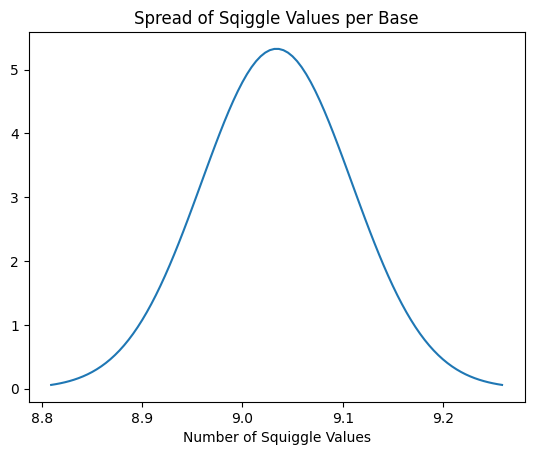

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = mean
sigma = std
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title("Spread of Sqiggle Values per Base")
plt.xlabel("Number of Squiggle Values")
plt.show()

### Compare that with Empirical Dataset

## Creating Synthetic Dataset (Squigulator Specific)

1. For choice of motifs and links, len of dataset create seq
2. Create synth.fasta
3. Run Squigulator to create blo5 file
4. Run slo5tools to convert blo5 to f5
5. Get raw data from f5 file
6. Get sequences for the raw data
7. Create Label from sequences
8. Create Dataset 

In [28]:
### Creating Sequence to be simulated

import numpy as np

len_motif = 20
len_link = 0 # To be implemented later
n_motifs = 10

motif_choices = [
    "AGTCTAGCTCGTACGTTCGA",
    "TGGCACTCATCAATCCGTAT",
    "GACTTGCAATCGCTAAGCTA",
    "CTATGAGGTCTGCCTTACAC",
    "AAGTCGTCTCGTTGCATCGA",
    "TCCAGTAGATCGTCAGCTTC",
    "GTACCGAATCTGGTAAGCTA",
    "CGATCATCGCAAGCTTAGAC",
    "ATTCGTCGAACATGCTTCCA",
    "GCTACTCGACTTGAAGCTGA"
]

vocab = motif_choices.append('b')

links = ['']
len_dataset = 100000  # Number of Bases

motif_dataset = []
n_motifs = int(len_dataset/(len_motif + len_link))

base_seq = ""

for i in range(n_motifs):
    motif_choice = np.random.choice(motif_choices)
    motif_dataset.append(motif_choices.index(motif_choice))
    # link = links[motif_choices.index(motif_choice)] - To be implemented later
    base_seq += motif_choice 

## Sequence

In [3]:
### Storing sequence in file

base_filepath = r"C:\Users\Parv\Doc\HelixWorks\Basecalling\squigulator\sample.fa.txt"
with open(base_filepath, 'r') as f:
    fasta_seq = f.readlines()[1]

# Then we simulate using squigulator (can't do here since we need to use bash) and convert blow5 to fast5 using slo tools

In [4]:
### Getting raw from f5

fast5_filepath = r"C:\Users\Parv\Doc\HelixWorks\Basecalling\squigulator\slow5tools-v1.1.0\out_signal.fast5"

raw_data_arr, read_ids = get_data_from_fast5(fast5_filepath)

In [5]:
### Getting base seqeuences corresponding to data

read_sequences = []
for read_id in read_ids:
    split_id = read_id.split('!') # To get the starting and ending character positions for the specific read id
    starting_pos, ending_pos = int(split_id[2]), int(split_id[3])
    read_seq = fasta_seq[starting_pos:ending_pos]
    read_sequences.append(read_seq)

len(read_sequences) == len(read_ids) == len(raw_data_arr)

True

### Distribution of values representing one base and one sequence

In [31]:
import numpy as np

squiggle_per_base = []
squiggles_per_read = []
bases_per_read = []

for i in range(len(raw_data_arr)):
    squiggle_per_base.append(len(raw_data_arr[i])/len(read_sequences[i]))
    squiggles_per_read.append(len(raw_data_arr[i]))
    bases_per_read.append(len(read_sequences[i]))
                              
squiggle_per_base = np.array(squiggle_per_base)
mean_base = np.mean(squiggle_per_base)
std_base = np.std(squiggle_per_base)

squiggles_per_read = np.array(squiggles_per_read)
mean_read = np.mean(squiggles_per_read)
std_read = np.std(squiggles_per_read)

bases_per_read = np.array(bases_per_read)
mean_b = np.mean(bases_per_read)
std_b = np.std(bases_per_read)

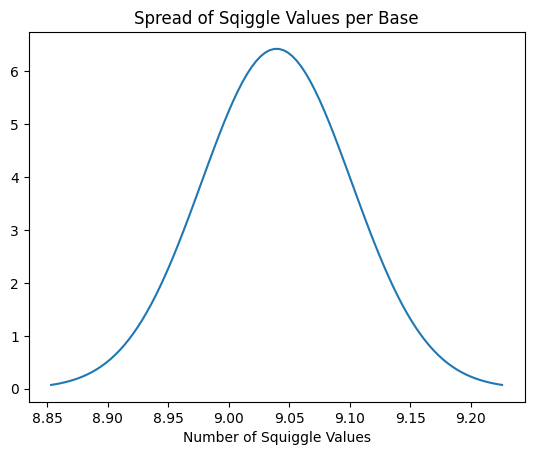

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = mean_base
sigma = std_base
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title("Spread of Sqiggle Values per Base")
plt.xlabel("Number of Squiggle Values")
plt.show()

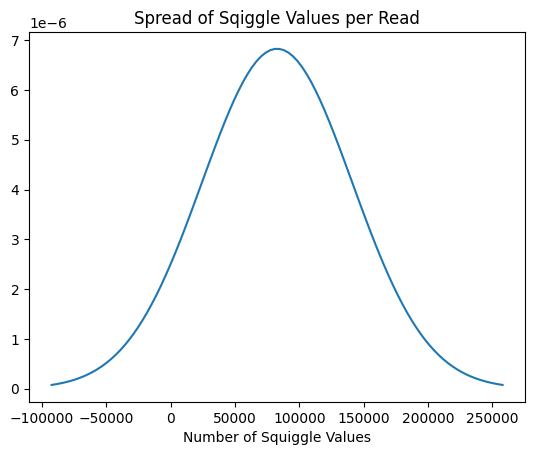

In [32]:
mu = mean_read
sigma = std_read
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title("Spread of Sqiggle Values per Read")
plt.xlabel("Number of Squiggle Values")
plt.show()

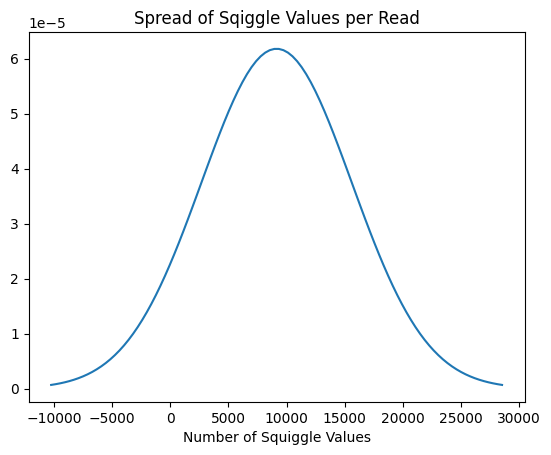

In [33]:
mu = mean_b
sigma = std_b
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title("Spread of Sqiggle Values per Read")
plt.xlabel("Number of Squiggle Values")
plt.show()

In [40]:
# Don't think that we need to make them the same size since we find the probability distribution over alignments corresponding to individual tokens 
# First let us try motif searching

for i in range(len(read_sequences)):
    read_id = read_ids[i]
    split_id = read_id.split('!') # To get the starting and ending character positions for the specific read id
    starting_pos, ending_pos = int(split_id[2]), int(split_id[3])
    print(starting_pos, ending_pos)
    # If more than 10 overlap - add motif otherwise, skip till finish of motif basically
    break

10032 13101


## Creating Dataset

In [7]:
### Creating label from sequences
motif_sequences = []

motif_choices = [
    "AGTCTAGCTCGTACGTTCGA",
    "TGGCACTCATCAATCCGTAT",
    "GACTTGCAATCGCTAAGCTA",
    "CTATGAGGTCTGCCTTACAC",
    "AAGTCGTCTCGTTGCATCGA",
    "TCCAGTAGATCGTCAGCTTC",
    "GTACCGAATCTGGTAAGCTA",
    "CGATCATCGCAAGCTTAGAC",
    "ATTCGTCGAACATGCTTCCA",
    "GCTACTCGACTTGAAGCTGA"
]


for i in range(len(read_sequences)):
    # divide by 20 and then get next and same or whatever
    read_id = read_ids[i]
    split_id = read_id.split('!') # To get the starting and ending character positions for the specific read id
    starting_pos, ending_pos = int(split_id[2]), int(split_id[3])
    
    readsq = read_sequences[i]
    
    readsq = readsq[20 - starting_pos%20:len(readsq)-ending_pos%20]
    
    motif_seq = ""
    for i in range(0, len(readsq), 20):
        motif = readsq[i:i+20]
        motif_seq += f"{motif_choices.index(motif)}"
    motif_sequences.append(motif_seq)



In [8]:
len(motif_sequences) == len(read_sequences)

True

In [12]:
import pandas as pd
### Creating Dataset
# columns for well the squiggle, the basecalled sequence and the corresponding motif sequence

df = pd.DataFrame()

df['Squiggle'] = raw_data_arr
df['Bases'] = read_sequences
df['read_id'] = read_ids
df['Motifs'] = motif_sequences


In [13]:
### First see the accuracy of a basecaller actually - get the baseline 
df.head(5)

,Squiggle,Bases,read_id,Motifs
0,"[509, 509, 492, 507, 493, 498, 484, 495, 494, ...",CTAAGCTACGATCATCGCAAGCTTAGACAGTCTAGCTCGTACGTTC...,S1_1!seq_3782!10032!13101!-,7064499647480989982503691708864342736221395068...
1,"[503, 503, 491, 495, 493, 499, 497, 496, 489, ...",TCGAGTACCGAATCTGGTAAGCTACGATCATCGCAAGCTTAGACAT...,S1_10!seq_3782!20576!31513!-,6780778990100936425515037039275516771585374937...
2,"[466, 457, 460, 454, 459, 462, 459, 464, 472, ...",TGAAGCTGACTATGAGGTCTGCCTTACACAAGTCGTCTCGTTGCAT...,S1_100!seq_3782!23371!37737!+,3442889120067265698264494267153806625359098774...
3,"[433, 430, 445, 428, 432, 433, 434, 434, 437, ...",AGATCGTCAGCTTCAGTCTAGCTCGTACGTTCGACTATGAGGTCTG...,S1_1000!seq_3782!60406!83359!+,0375880578666488625417841725459385174412201173...
4,"[373, 376, 378, 381, 385, 386, 378, 375, 381, ...",CGAATCTGGTAAGCTATCCAGTAGATCGTCAGCTTCAAGTCGTCTC...,S1_1001!seq_3782!34624!38397!-,5470577790954764452442925325214768421237927304...


In [15]:
df.to_pickle("synth_dataset.pkl")  